In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.dates import MonthLocator, DateFormatter

In [2]:
#read in datasets
train = pd.read_csv('../data/clean_train.csv')
weather = pd.read_csv('../data/clean_weather.csv')
stat1 = pd.read_csv('../data/clean_stat1.csv')
stat2 = pd.read_csv('../data/clean_stat2.csv')

In [3]:
train.head(1)

,date,species,block,street,latitude,longitude,nummosquitos,wnvpresent,year,month,day
0,2007-05-29,CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,41.95469,-87.800991,1,0,2007,5,29


In [4]:
#train datasets ratio for wnv
train.wnvpresent.value_counts(normalize=True)

0    0.947554
1    0.052446
Name: wnvpresent, dtype: float64

Dataset is imbalance class where detected WNV is only 5.2% of the data. Stratification  and bootstrap is required during prediction and modelling.

## Date

In [5]:
train.date = pd.to_datetime(train.date)

In [6]:
#set_index train
date_df = train.set_index('date')
date_df = date_df.resample('2W').sum()

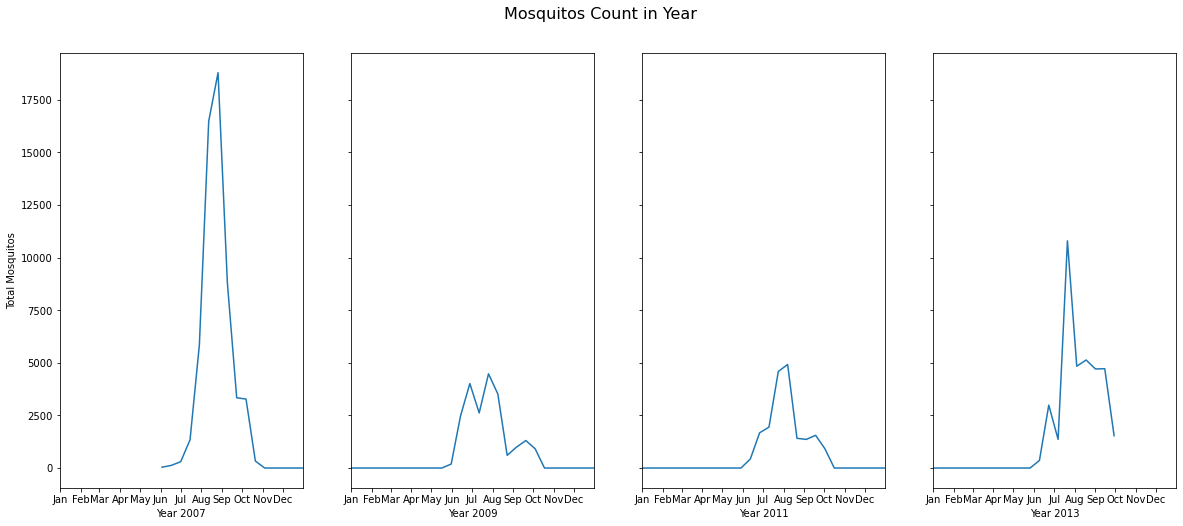

In [33]:
#plot graphs for mosquito count in each year
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,8), sharey=True)
ax = ax.flatten()

for idx in range(len(train.year.unique())):
    year = 2007 + idx * 2
    sns.lineplot(data=date_df, x=date_df.index, y='nummosquitos', ax=ax[idx])
    #set xlim between Jan to Dec
    ax[idx].set_xlim(xmin=datetime.date(year, 1, 1), xmax=datetime.date(year, 12, 31))
    ax[idx].set_xlabel(f'Year {year}')
    ax[idx].set_ylabel('Total Mosquitos')
    ax[idx].xaxis.set_major_locator(MonthLocator())
    ax[idx].xaxis.set_major_formatter(DateFormatter('%b'))


plt.suptitle(t='Mosquitos Count in Year',x=0.5, y = 0.96, fontsize=16);
plt.savefig('../images/Mosquito_Count_in_Year.png',)
plt.show()

*Interpretation: Spike mosquito count between the fall season (Jul and August) in all 4 recorded years in the dataset, wtih year 2007 the highest spike.*

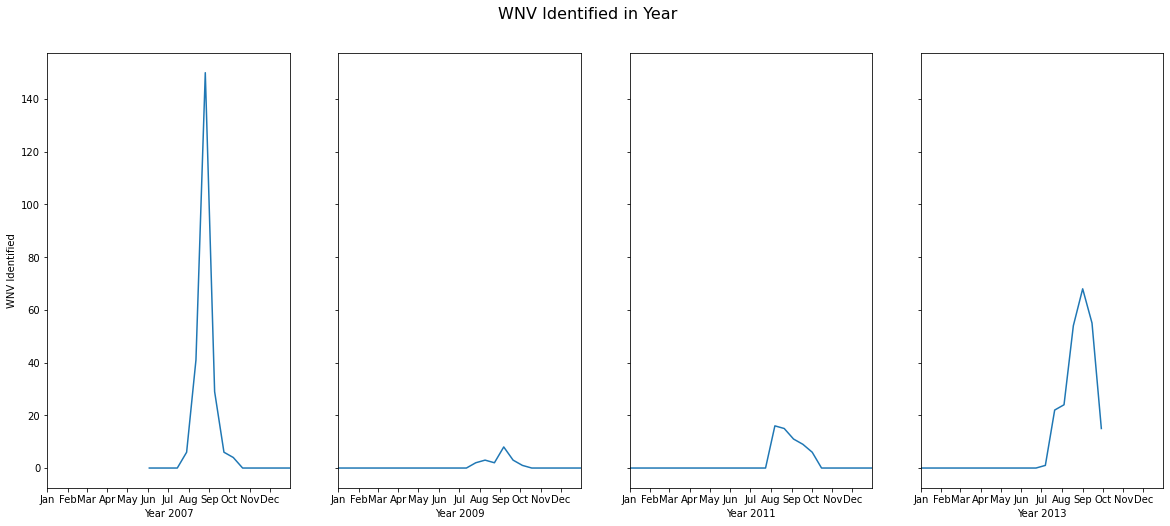

In [8]:
#plot graphs for wnvpresent in each year
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20,8), sharey=True)
ax = ax.flatten()

for idx in range(len(train.year.unique())):
    year = 2007 + idx * 2
    sns.lineplot(data=date_df, x=date_df.index, y='wnvpresent', ax=ax[idx])
    #set xlim between Jan to Dec
    ax[idx].set_xlim(xmin=datetime.date(year, 1, 1), xmax=datetime.date(year, 12, 31))
    ax[idx].set_xlabel(f'Year {year}')
    ax[idx].set_ylabel('WNV Identified')
    ax[idx].xaxis.set_major_locator(MonthLocator())
    ax[idx].xaxis.set_major_formatter(DateFormatter('%b'))

plt.suptitle(t='WNV Identified in Year',x=0.5, y = 0.96, fontsize=16);
plt.savefig('../images/WNV_Identified_in_Year.png',)
plt.show()

*Interpretation: The presence of WNV found is also consistent in all 4 years, with 2009 lowers WNV presence but an impending growth from 2009 to 2013.*

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          10506 non-null  datetime64[ns]
 1   species       10506 non-null  object        
 2   block         10506 non-null  int64         
 3   street        10506 non-null  object        
 4   latitude      10506 non-null  float64       
 5   longitude     10506 non-null  float64       
 6   nummosquitos  10506 non-null  int64         
 7   wnvpresent    10506 non-null  int64         
 8   year          10506 non-null  int64         
 9   month         10506 non-null  int64         
 10  day           10506 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 903.0+ KB


In [10]:
train.year.unique()

array([2007, 2009, 2011, 2013])

In [11]:
train.month.unique()

array([ 5,  6,  7,  8,  9, 10])

Train datasets are collected biannually from 2007 to 2013. The months of collected data are in May to Oct. 

In [12]:
#calc rate WNV in num mosquito
#groupby month
rate_m = train.groupby(by='month').agg('sum')[['wnvpresent','nummosquitos']]
rate_m['wnv_rate'] = (rate_m['wnvpresent']/rate_m['nummosquitos']*100).round(2)

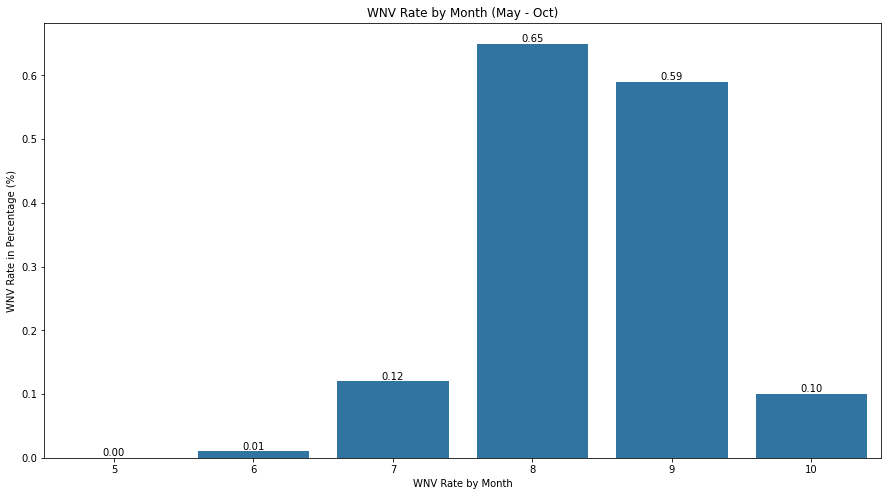

In [13]:
#plot rate of wnv by month

plt.figure(figsize=(15,8))
graph = sns.barplot(data=rate_m,x=rate_m.index,y='wnv_rate', color='tab:blue',)
plt.title('WNV Rate by Month (May - Oct)')
plt.xlabel('WNV Rate by Month')
plt.ylabel('WNV Rate in Percentage (%)')
#annotation
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
plt.savefig('../images/WNV_Rate_by_Months.png')
plt.show()


*Interpretation: Data collected between May to Oct, where its the end Spring to Autumn. The collection period indicates a seasonality concern on WNV breeding.*

In [14]:
#calc rate WNV in num mosquito
#groupby year
rate_y = train.groupby(by='year').agg('sum')[['wnvpresent','nummosquitos']]
rate_y['wnv_rate'] = (rate_y['wnvpresent']/rate_y['nummosquitos']*100).round(2)

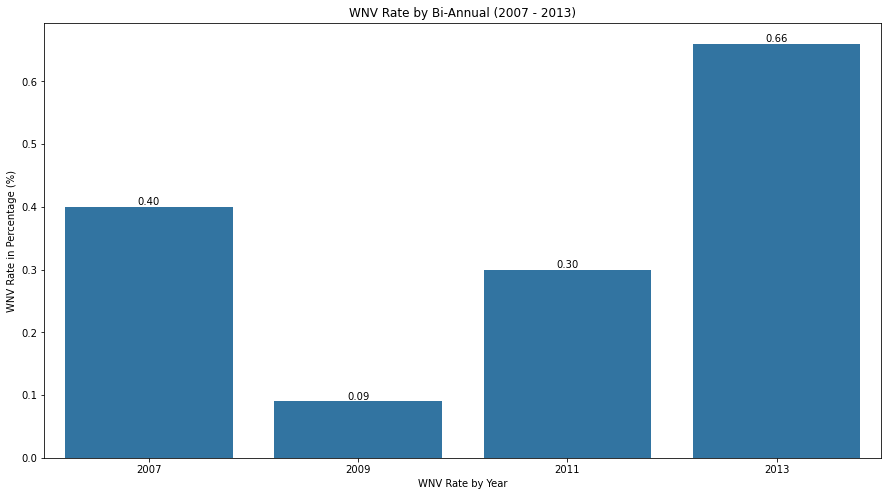

In [15]:
#plot rate of wnv by year

plt.figure(figsize=(15,8))
graph = sns.barplot(data=rate_y,x=rate_y.index,y='wnv_rate', color='tab:blue',)
plt.title('WNV Rate by Bi-Annual (2007 - 2013)')
plt.xlabel('WNV Rate by Year')
plt.ylabel('WNV Rate in Percentage (%)')
#annotation
for p in graph.patches:
        graph.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

plt.savefig('../images/WNV_Rate_by_Year.png',)
plt.show()

*Interpretation: In 2009, there is a dip in WNV presence, but has almost tripled in 2013. This shows consistency with the above WNV Identified in Year.*

*This downward trend in 2009 is said to be a result of changes in immunity of hosts, preventive behaviour of host (use of repellents) or other environmentsl factors [(West Nile Virus Activity (CDC), 2010)](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5925a1.htm)*

*In growing trends in 2013, is mostly driven due to climate change. This is reported in a study by Public Medical Center [(Shlomit Paz, 2013)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4342965/)*

## Species

In [16]:
#groupby mosquitos species
rate = train.groupby(by='species').agg('sum')

In [17]:
rate

,block,latitude,longitude,nummosquitos,wnvpresent,year,month,day
species,,,,,,,,
CULEX ERRATICUS,10,41.974689,-87.890615,7,0,2013,9,6
CULEX PIPIENS,88527,112854.372337,-236649.617578,44671,240,5421463,22044,39539
CULEX PIPIENS/RESTUANS,174429,198865.648503,-416775.307552,66268,262,9550042,36588,74276
CULEX RESTUANS,100789,114693.922296,-240334.622989,23431,49,5508292,19730,42483
CULEX SALINARIUS,2806,3596.961565,-7541.665800,145,0,172752,644,1214
CULEX TARSALIS,183,250.908138,-525.969405,7,0,12062,53,114
CULEX TERRITANS,8192,9279.221850,-19460.159333,510,0,445984,1750,3545


In [18]:
#calculate rate of wnv mosquitos
rate['wnv_rate'] = (rate['wnvpresent']/rate['nummosquitos']*100).round(2)

In [19]:
rate

,block,latitude,longitude,nummosquitos,wnvpresent,year,month,day,wnv_rate
species,,,,,,,,,
CULEX ERRATICUS,10,41.974689,-87.890615,7,0,2013,9,6,0.00
CULEX PIPIENS,88527,112854.372337,-236649.617578,44671,240,5421463,22044,39539,0.54
CULEX PIPIENS/RESTUANS,174429,198865.648503,-416775.307552,66268,262,9550042,36588,74276,0.40
CULEX RESTUANS,100789,114693.922296,-240334.622989,23431,49,5508292,19730,42483,0.21
CULEX SALINARIUS,2806,3596.961565,-7541.665800,145,0,172752,644,1214,0.00
CULEX TARSALIS,183,250.908138,-525.969405,7,0,12062,53,114,0.00
CULEX TERRITANS,8192,9279.221850,-19460.159333,510,0,445984,1750,3545,0.00


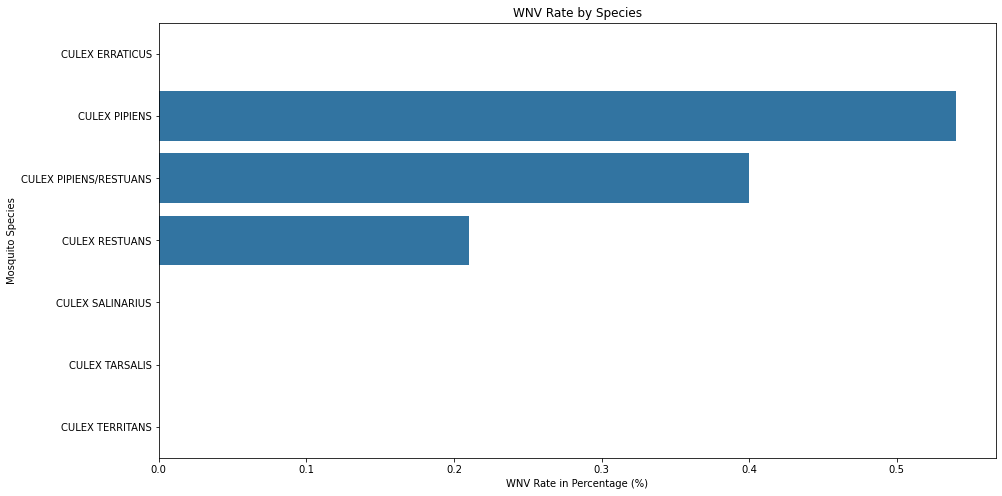

In [20]:
#plot rate of wnvpresent by species

plt.figure(figsize=(15,8))
sns.barplot(data=rate,y=rate.index,x='wnv_rate', orient='h', color='tab:blue',)
plt.title('WNV Rate by Species')
plt.xlabel('WNV Rate in Percentage (%)')
plt.ylabel('Mosquito Species')
plt.savefig('../images/WNR_Rate_Mosquito_Species.png',)
plt.show()

*Interpretation: Culex Erraticus,m Cules Salinarius, Cules Tarsalis, Culex Territans are species that does not show any presence in WNV, whereas Culex Pipiens has the highest exposure with 0.5% of the caught numbers carry WNV. All non carrying WNV mosquitos species will be categorised as Others.*